In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
#!/usr/bin/env python3
"""
Example script demonstrating the Kalman filter forecaster.

This script shows how to use the create_kalman_forecaster function
with both univariate and multivariate time series data.
"""

import sys
import os
import numpy as np
from forecast import create_kalman_forecaster, evaluate_forecasts

plt.rc('text', usetex=True)  # Enable LaTeX
plt.rc('font', family='serif')  # Use a serif font (e.g., Computer Modern)
plt.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % For \mathbb
    \usepackage{amssymb}  % For \mathbb
    \usepackage{bm}       % For bold math symbols
    \usepackage{underscore} % If underscores are needed
'''

# Univariate example

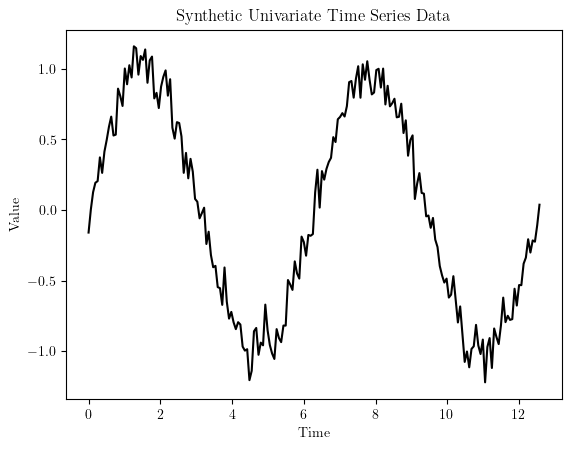

In [91]:
# Generate synthetic univariate data
t = np.linspace(0, 4 * np.pi, 200)
data = np.sin(t) + 0.1 * np.random.randn(200)

plt.plot(t, data, c='k')
plt.title("Synthetic Univariate Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [52]:
# Create forecaster using last 3 observations
observation_lag = 3
forecaster = create_kalman_forecaster(data, observation_lag=observation_lag)

In [82]:
# Make multiple forecasts
print("\nMultiple sequential forecasts:")
recent_obs = data[-observation_lag:].tolist()
for i in range(5):
    y_hat = forecaster(*recent_obs[::-1])  # Reverse order: most recent first
    print(f"  Forecast {i+1}: {y_hat:.4f}")
    # Update recent observations (rolling window)
    recent_obs = recent_obs[1:] + [y_hat]


Multiple sequential forecasts:
  Forecast 1: -0.3225
  Forecast 2: -0.3102
  Forecast 3: -0.2988
  Forecast 4: -0.2879
  Forecast 5: -0.2774


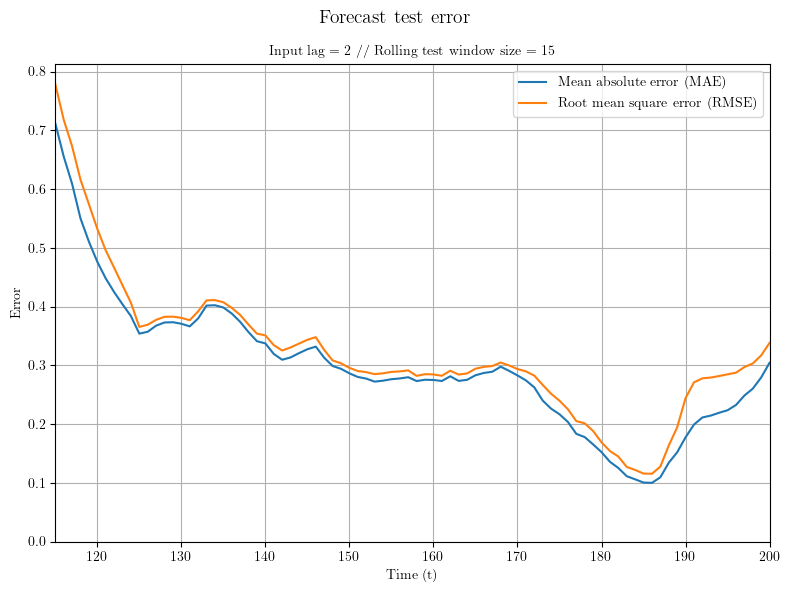

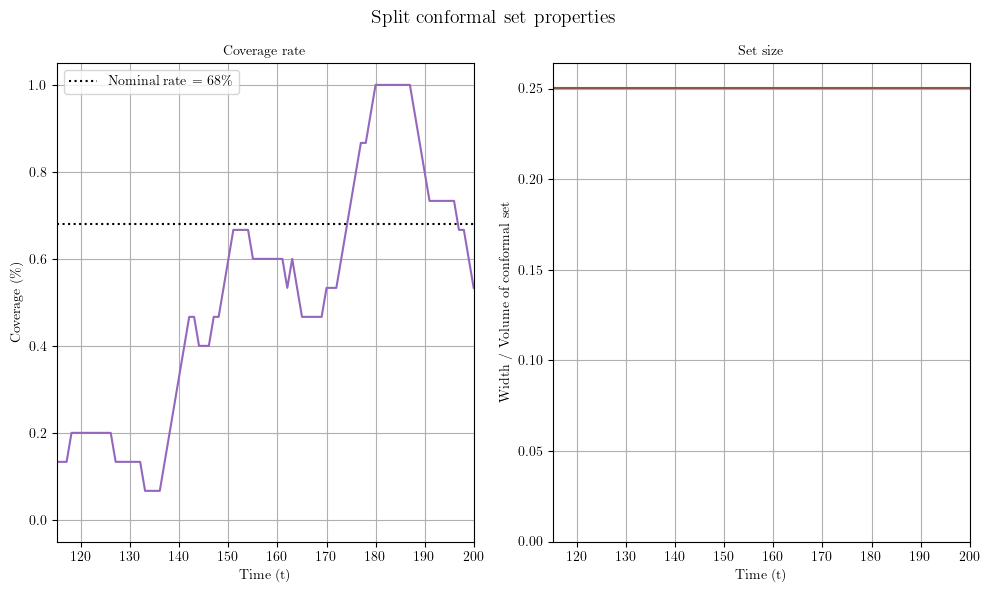

In [98]:
results = evaluate_forecasts(
    forecaster=forecaster,
    train_data=data[:100],
    test_data=data[100:],
    observation_lag=observation_lag,
    show=True
)

# Multivariate example

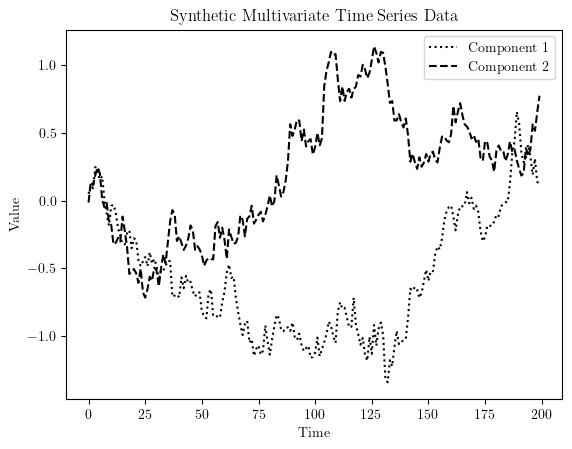

In [92]:
# Generate synthetic multivariate data (2D random walk)
np.random.seed(42)
n_samples = 200
n_features = 2

data = np.cumsum(np.random.randn(n_samples, n_features) * 0.1, axis=0)

color = 'k'
plt.plot(data[:, 0], color=color, linestyle=':', linewidth=1.5, label='Component 1')
plt.plot(data[:, 1], color=color, linestyle='--', linewidth=1.5, label='Component 2')
plt.title("Synthetic Multivariate Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [93]:
# Create forecaster using last 2 observations
observation_lag = 2
forecaster = create_kalman_forecaster(data, observation_lag=observation_lag)

In [94]:
# Make multiple forecasts
print("\nMultiple sequential forecasts:")
recent_obs = data[-observation_lag:].tolist()
for i in range(5):
    y_hat = forecaster(*recent_obs[::-1])  # Reverse order: most recent first
    print(f"  Forecast {i+1}: {y_hat}")
    # Update recent observations (rolling window)
    recent_obs = recent_obs[1:] + [y_hat]


Multiple sequential forecasts:
  Forecast 1: [0.13428863 0.75988542]
  Forecast 2: [0.14254698 0.74490201]
  Forecast 3: [0.15058179 0.7301064 ]
  Forecast 4: [0.15840114 0.71549428]
  Forecast 5: [0.16600849 0.70106454]


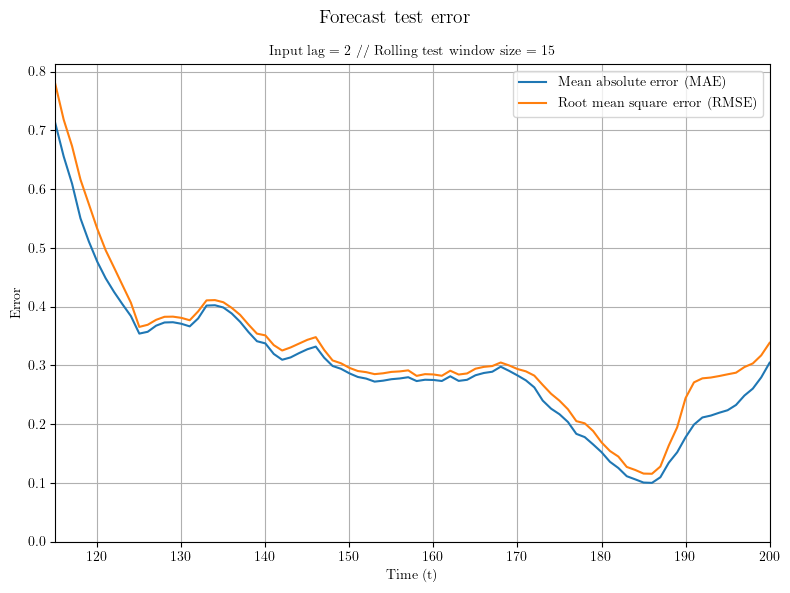

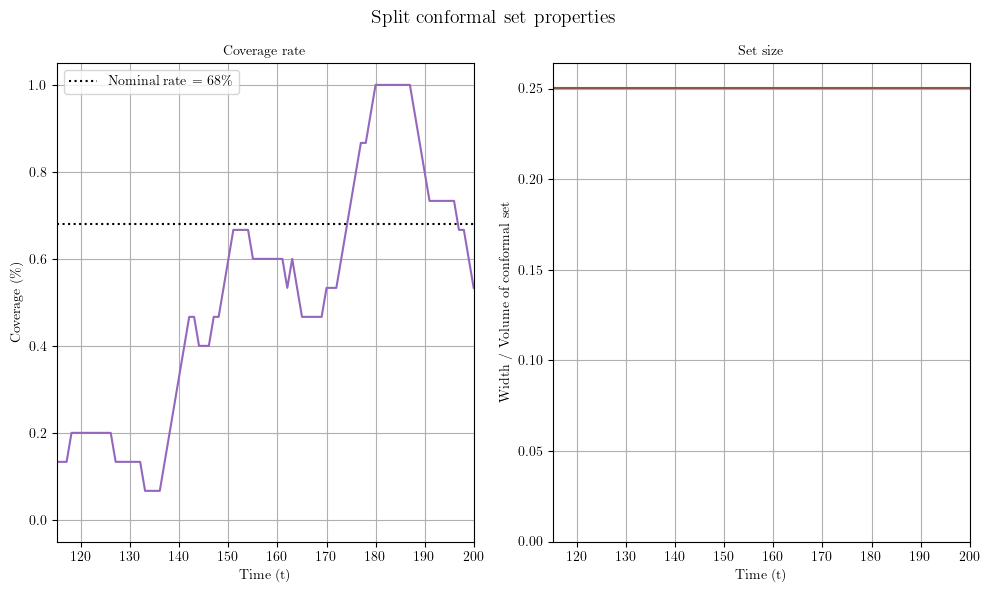

In [97]:
results = evaluate_forecasts(
    forecaster=forecaster,
    train_data=data[:100],
    test_data=data[100:],
    observation_lag=observation_lag,
    show=True
)